In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data=fetch_openml("mnist_784",version=1)

In [4]:
dir(data)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
X=data.data
y=data.target

In [6]:
X.shape,y.shape

((70000, 784), (70000,))

In [7]:

X=X.to_numpy()

In [8]:

y=y.to_numpy()

In [9]:
X[2022,:].mean()

27.761479591836736

In [10]:
(np.where(X[2022,:]==0)[0]).shape

(643,)

In [11]:
X_train=X[:10000,:]
y_train=y[:10000]
X_test=X[10000:12000,:]
y_test=y[10000:12000]

In [12]:
np.unique(y_train).shape

(10,)

In [13]:
np.where(y_train=='6')[0].shape,np.where(y_train=='9')[0].shape

((1014,), (978,))

In [14]:
np.unique(y_test)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [15]:
data.target[10000:12000].describe()

count     2000
unique      10
top          1
freq       224
Name: class, dtype: object

In [16]:
def data_matrix_setting(X,y):
    indices_6=np.where(y=='6')[0]
    indices_9=np.where(y=='9')[0]
#     print(X[indices_6,:].shape,X[indices_9,:].shape)
    indx=np.concatenate((indices_6,indices_9),axis=0)
    X_=X[indx,:]# np.zeros((len(indices_6)+len(indices_9),X.shape[1]))
#     print(X_.shape)
#     print(len(indices_6),X[indices_6,:].shape)
#     print(X_[:,:].shape,"HI")
#     X_[:len(indices_6),:]=X[indices_6,:]
#     X_[:len(indices_9),:]=X[indices_9,:]
    y_=np.concatenate((np.ones(len(indices_6)),-1*np.ones(len(indices_9))))# np.ones(len(indices_6)+len(indices_9))
    assert X_.shape[0]==y_.shape[0]
    return X_,y_

In [17]:
x,y=data_matrix_setting(X_train,y_train)

In [18]:
from sklearn.utils import shuffle

In [19]:
x_,y_=shuffle(x,y,random_state=1729)

In [20]:
x_.shape,y_.shape

((1992, 784), (1992,))

In [21]:
y_[:3]

array([ 1., -1., -1.])

In [22]:
from sklearn.linear_model import Perceptron
clf=Perceptron(random_state=1729,alpha=1.0,max_iter=10,shuffle=False,fit_intercept=True,penalty=None)


In [23]:
clf.fit(X_train,y_train)

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(alpha=1.0, max_iter=10, random_state=1729, shuffle=False)

In [24]:
clf.fit(x_,y_)

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(alpha=1.0, max_iter=10, random_state=1729, shuffle=False)

In [25]:
clf.coef_[0,69]

605.0

In [26]:
clf=Perceptron(random_state=1729,alpha=1.0,max_iter=1,shuffle=False,fit_intercept=True,penalty=None)
for i in range(5):
    clf.partial_fit(x_,y_,classes=np.unique(y_))
    print(clf.intercept_[0])

-1.0
-4.0
-4.0
-6.0
-5.0


In [27]:
#GRADED ASSIGNMENT 5
def data_matrix_setting(X,y):
    indices_5=np.where(y=='5')[0]
    indices_3=np.where(y=='3')[0]
    indx=np.concatenate((indices_5,indices_3),axis=0)
    X_=X[indx,:]
    y_=np.concatenate((np.ones(len(indices_5)),-1*np.ones(len(indices_3))))# np.ones(len(indices_6)+len(indices_9))
    assert X_.shape[0]==y_.shape[0]
    return X_,y_

In [28]:
X_,y_=data_matrix_setting(X_train,y_train)

In [29]:
clf=Perceptron(random_state=42,eta0=1,max_iter=100,shuffle=True,
              fit_intercept=True,penalty=None)
clf.fit(X_,y_)

Perceptron(eta0=1, max_iter=100, random_state=42)

In [30]:
X__,y__=data_matrix_setting(X_test,y_test)

In [31]:
len(np.where(y_==-1)[0])

1032

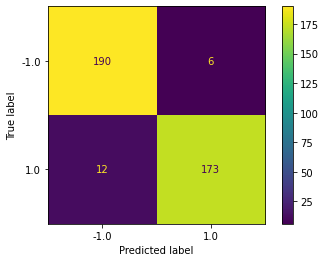

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y__,clf.predict(X__))

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=10,random_state=1)
X_transform_=pca.fit(X_).transform(X_)

In [35]:
X_transform__=pca.fit(X__).transform(X__)

In [36]:
clf=Perceptron(random_state=42,eta0=1,max_iter=100,shuffle=True,
              validation_fraction=0.1,fit_intercept=True,penalty=None,warm_start=False)
clf.fit(X_transform_,y_)

Perceptron(eta0=1, max_iter=100, random_state=42)

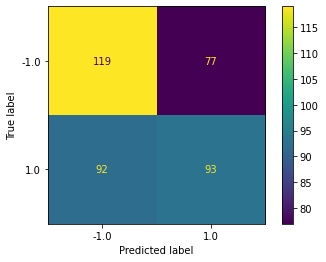

In [37]:
ConfusionMatrixDisplay.from_predictions(y__,clf.predict(X_transform__))

In [38]:
# PRACTICE ASSIGNMENT 6
np.random.seed(42)

In [40]:
X=data.data
y=data.target
X=X.to_numpy()
y=y.to_numpy()

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)

In [42]:
y_train[-1]

'6'

In [43]:
indices_6=np.where(y_train=='6')[0]
indices_9=np.where(y_train=='9')[0]
indx=np.concatenate((indices_6,indices_9),axis=0)
X_train_69=X_train[indx,:]
y_train_69=np.concatenate((np.ones(len(indices_6)),np.zeros(len(indices_9))))# np.ones(len(indices_6)+len(indices_9))
X_train_69,y_train_69=shuffle(X_train_69,y_train_69,random_state=1729)
indices_6=np.where(y_test=='6')[0]
indices_9=np.where(y_test=='9')[0]
indx=np.concatenate((indices_6,indices_9),axis=0)
X_test_69=X_train[indx,:]
y_test_69=np.concatenate((np.ones(len(indices_6)),np.zeros(len(indices_9))))# np.ones(len(indices_6)+len(indices_9))
X_test_69,y_test_69=shuffle(X_test_69,y_test_69,random_state=1729)

In [44]:
np.sum(y_train_69)

4855.0

In [45]:
y_test_69.sum()

2021.0

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_69Tf=scaler.fit(X_train_69).transform(X_train_69)

In [47]:
x_train_69Tf[0,:].mean()

0.08128379559427823

In [48]:
x_train_69Tf[:,0].mean()

0.0

In [49]:
np.std(x_train_69Tf[0,:])

0.7358823226037738

In [50]:
np.std(x_train_69Tf[:,0])

0.0

In [51]:
from sklearn.linear_model import SGDClassifier
?SGDClassifier

In [52]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
l=[]
sgd=SGDClassifier(loss='log',penalty=None,random_state=10,max_iter=1,eta0=0.01)
for i in range(10):    
    sgd.partial_fit(x_train_69Tf,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict(x_train_69Tf)))

In [53]:
l

[0.04252720237261636,
 0.035439335310513805,
 0.021263683229960455,
 0.021263683229960455,
 0.024807657782837625,
 0.021263683229960455,
 0.01771970867708329,
 0.01771970867708329,
 0.01771970867708329,
 0.01771970867708329]

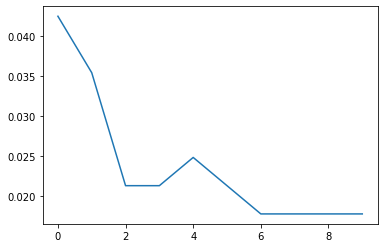

In [54]:
plt.plot(range(10),l)

In [55]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
l=[]
sgd=SGDClassifier(penalty='l2',loss='log',alpha=0,learning_rate='constant',random_state=10,max_iter=1,eta0=0.000001,warm_start=True)
for i in range(10):    
    sgd.partial_fit(X_train_69,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict(X_train_69)))

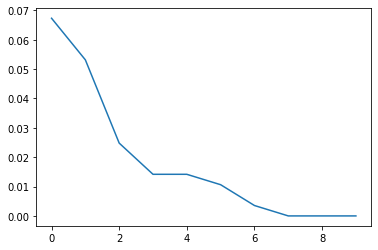

In [56]:
plt.plot(range(10),l)

In [57]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
l=[]
sgd=SGDClassifier(penalty='l2',loss='log',alpha=0,learning_rate='constant',random_state=10,max_iter=1,eta0=0.01,warm_start=True)
for i in range(10):    
    sgd.partial_fit(X_train_69,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict(X_train_69)))

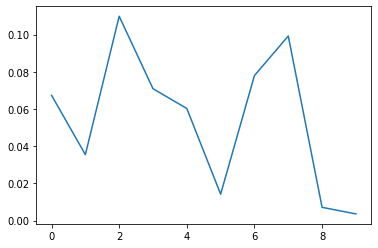

In [58]:
plt.plot(range(10),l)

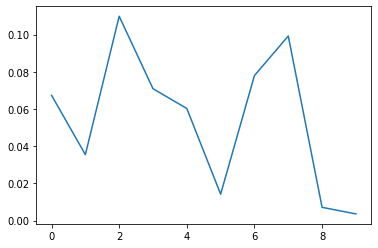

In [59]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',penalty='l2',alpha=0,random_state=10,
                 max_iter=1,warm_start=True,learning_rate='constant',eta0=0.01)
l=[]
for i in range(10):
    sgd.partial_fit(X_train_69,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict(X_train_69)))
plt.plot(np.arange(10),l)

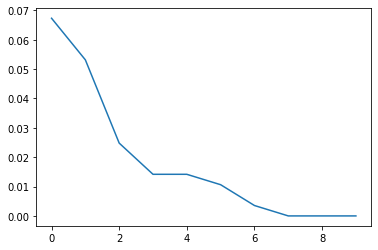

In [60]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',penalty='l2',alpha=0,random_state=10,
                 max_iter=1,warm_start=True,learning_rate='constant',eta0=0.000001)
l=[]
for i in range(10):
    sgd.partial_fit(X_train_69,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict(X_train_69)))
plt.plot(np.arange(10),l)

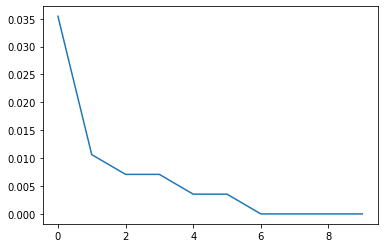

In [61]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',penalty='l2',alpha=0,random_state=10,
                 max_iter=1,warm_start=True,learning_rate='constant',eta0=0.01)
l=[]
for i in range(10):
    sgd.partial_fit(x_train_69Tf,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict(x_train_69Tf)))
plt.plot(np.arange(10),l)

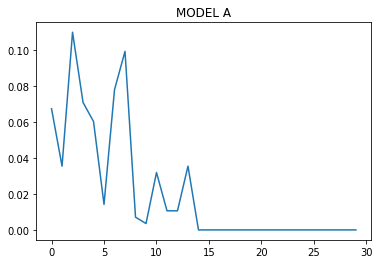

In [76]:
# GRADED ASSIGNMENT 6
from sklearn.linear_model import SGDClassifier
# MODEL A
sgd=SGDClassifier(loss="log",penalty='l2',alpha=0,validation_fraction=0.1,
                 warm_start=True,random_state=10,max_iter=1,eta0=0.01,learning_rate='constant')
l=[]
for i in range(30):
    sgd.partial_fit(X_train_69,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict_proba(X_train_69)))

plt.title("MODEL A")    
plt.plot(range(30),l)


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

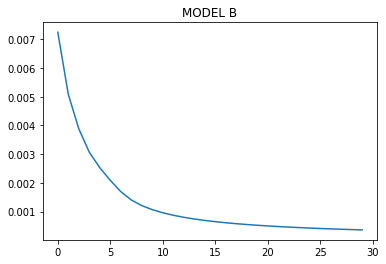

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
# MODEL B
sgd=SGDClassifier(loss="log",penalty='l2',alpha=0,
                 warm_start=True,random_state=10,max_iter=1,eta0=0.000001,learning_rate='constant')
l=[]
pipe=make_pipeline(sgd)
for i in range(30):
    pipe.fit(X_train_69,y_train_69)
    l.append(log_loss(y_train_69,pipe.predict_proba(X_train_69)))

plt.title("MODEL B")    
plt.plot(range(30),l)


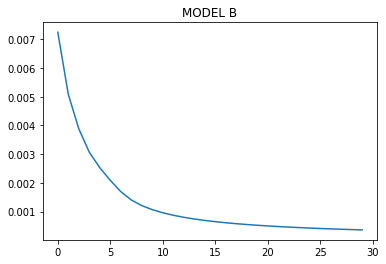

In [74]:
from sklearn.linear_model import SGDClassifier
# MODEL B
sgd=SGDClassifier(loss="log",penalty='l2',alpha=0,
                 warm_start=True,random_state=10,max_iter=1,eta0=0.000001,learning_rate='constant')
l=[]
for i in range(30):
    sgd.partial_fit(X_train_69,y_train_69,classes=np.unique(y_train_69))
    l.append(log_loss(y_train_69,sgd.predict_proba(X_train_69)))

plt.title("MODEL B")    
plt.plot(range(30),l)


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

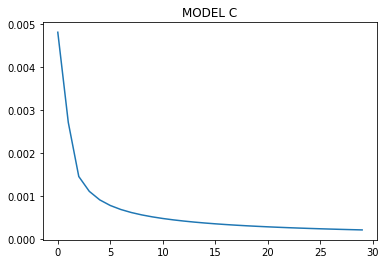

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
# MODEL C
sgd=SGDClassifier(loss="log",penalty='l2',alpha=0,
                 warm_start=True,random_state=10,max_iter=1,eta0=0.01,learning_rate='constant')
l=[]
pipe=make_pipeline(StandardScaler(),sgd)
for i in range(30):
    pipe.fit(X_train_69,y_train_69)
    l.append(log_loss(y_train_69,pipe.predict_proba(X_train_69)))

plt.title("MODEL C")    
plt.plot(range(30),l)


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

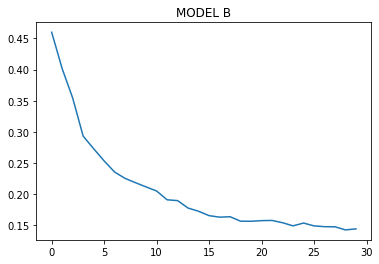

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
# MODEL D
sgd=SGDClassifier(loss="log",penalty='l2',alpha=0,
                 warm_start=True,random_state=10,max_iter=1,eta0=0.01,learning_rate='invscaling',power_t=1)
l=[]
pipe=make_pipeline(sgd)
for i in range(30):
    pipe.fit(X_train_69,y_train_69)
    l.append(log_loss(y_train_69,pipe.predict_proba(X_train_69)))

plt.title("MODEL B")    
plt.plot(range(30),l)


C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


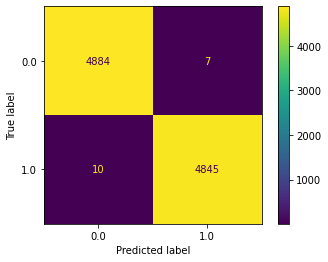

In [82]:
sgd=SGDClassifier(loss='log',learning_rate='invscaling',
                 max_iter=10,random_state=10,shuffle=True,
                 power_t=0.5,penalty='l2',alpha=0,eta0=0.5,
                 warm_start=True)
pipe=make_pipeline(sgd)
pipe.fit(X_train_69,y_train_69)
ConfusionMatrixDisplay.from_predictions(y_train_69,pipe.predict(X_train_69))

In [88]:
y_pred=pipe.predict(X_train_69)
np.where((y_pred!=y_train_69) & (y_pred==1))[0]

array([2167, 2407, 3036, 3368, 4217, 5556, 6230], dtype=int64)

In [89]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
X=fetch_20newsgroups()

In [92]:
X_=X.data
y=X.target

In [94]:
X_=TfidfVectorizer().fit_transform(X_)

In [95]:
X_.shape

(11314, 130107)

In [97]:
from sklearn.naive_bayes import MultinomialNB
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.3,random_state=0)

In [98]:
multinb=MultinomialNB()
multinb.fit(X_train,y_train)

MultinomialNB()

In [99]:
multinb.score(X_test,y_test)

0.8427098674521355

In [112]:
# PRACTICE ASSIGNMENT 7
text_data=['A metaverse is a network of 3D virtual worlds focused on social connection.',
           'In futurism and science fiction, the term is often described as a hypothetical iteration of the Internet as a single', 
           'universal virtual world that is facilitated by the use of virtual and augmented reality headsets.',
           'The term "metaverse" has its origins  the 1992 science fiction novel Snow Crash as a portmanteau of "meta" and "universe."',
           'Various metaverses have been developed for popular use such as virtual world platforms like Second Life.',
           'Some metaverse iterations involve integration between virtual and physical spaces and virtual economies',
           'often including a significant interest in advancing virtual reality technology.', 
           'The term has seen considerable use as a buzzword for public relations purposes to exaggerate development progress for various related technologies and projects.[10] Information privacy and user addiction are concerns within metaverses',
           'stemming from challenges facing the social media and video game industries as a whole.']
from sklearn.feature_extraction.text import CountVectorizer
X=CountVectorizer(min_df=2).fit_transform(text_data,)

In [105]:
?CountVectorizer

In [113]:
X.shape

(9, 20)

In [107]:
X=CountVectorizer().fit_transform(text_data)
X.shape

(9, 99)

In [117]:
CountVectorizer().fit_transform(text_data)

<9x99 sparse matrix of type '<class 'numpy.int64'>'
	with 138 stored elements in Compressed Sparse Row format>

In [119]:
c_Vec=CountVectorizer()
X=c_Vec.fit_transform(text_data)
c_Vec.vocabulary_

{'metaverse': 51,
 'is': 43,
 'network': 53,
 'of': 55,
 '3d': 2,
 'virtual': 94,
 'worlds': 98,
 'focused': 26,
 'on': 57,
 'social': 77,
 'connection': 15,
 'in': 35,
 'futurism': 29,
 'and': 5,
 'science': 71,
 'fiction': 25,
 'the': 86,
 'term': 84,
 'often': 56,
 'described': 18,
 'as': 7,
 'hypothetical': 34,
 'iteration': 44,
 'internet': 41,
 'single': 75,
 'universal': 88,
 'world': 97,
 'that': 85,
 'facilitated': 23,
 'by': 12,
 'use': 90,
 'augmented': 8,
 'reality': 68,
 'headsets': 33,
 'has': 31,
 'its': 46,
 'origins': 58,
 '1992': 1,
 'novel': 54,
 'snow': 76,
 'crash': 17,
 'portmanteau': 62,
 'meta': 50,
 'universe': 89,
 'various': 92,
 'metaverses': 52,
 'have': 32,
 'been': 9,
 'developed': 19,
 'for': 27,
 'popular': 61,
 'such': 81,
 'platforms': 60,
 'like': 48,
 'second': 72,
 'life': 47,
 'some': 78,
 'iterations': 45,
 'involve': 42,
 'integration': 39,
 'between': 10,
 'physical': 59,
 'spaces': 79,
 'economies': 21,
 'including': 36,
 'significant': 74,
 '

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
C_v=CountVectorizer()
Docs = ['This is the first question.', 'This document is the second document.', 'And this is the third one' ]
X=C_v.fit_transform(Docs)
print(X)

  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 2)	1
  (0, 5)	1
  (1, 9)	1
  (1, 3)	1
  (1, 7)	1
  (1, 1)	2
  (1, 6)	1
  (2, 9)	1
  (2, 3)	1
  (2, 7)	1
  (2, 0)	1
  (2, 8)	1
  (2, 4)	1


In [146]:
?NearestNeighbors

In [153]:
from sklearn.neighbors import NearestNeighbors
# ?NearestNeighbors
def k_closest( X:np.ndarray, p:np.array, k:int = 1):
    Xclosest = NearestNeighbors().fit(X)
    indices = Xclosest.kneighbors(p, k, return_distance=False)

    return X[indices[0]]

In [155]:
X = np.asarray([[72, 69 ,82],
 [ 9 ,79, 99],
 [20 ,47, 88],
 [80 ,64, 49]])
p= np.asarray([[0,0,0]])
k=1 
k_closest(X,p,k=1)

array([[20, 47, 88]])

In [156]:
from sklearn.datasets import load_digits
d=load_digits()
X=d.data
y=d.target


In [158]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [159]:
from sklearn.linear_model import LogisticRegression
pipe=make_pipeline(StandardScaler(),LogisticRegression(
multi_class='multinomial',solver='sag'))
pipe.fit(x_train,y_train)

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [164]:
len(np.where(y==7)[0])

179

In [166]:
np.mean(y_test==pipe.predict(x_test))

0.9666666666666667

In [169]:
from sklearn.metrics import f1_score,accuracy_score
accuracy_score(y_test,pipe.predict(x_test)),f1_score(y_test,pipe.predict(x_test),average="weighted")

(0.9666666666666667, 0.966907732026411)

In [170]:
# GRADED ASSIGNMENT 7
link="https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt"
df=pd.read_csv(link,chunksize=20000,iterator=True)

In [196]:
# PRACTICE ASSIGNMENT 8
from sklearn.datasets import load_iris
# def compute_score(X_train,y_train,X_test,y_test):
from sklearn.svm import SVC
dataa=load_iris()
X=dataa.data
y=dataa.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
# iris = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
# def COMPUTE_SCORE(X_train, y_train, X_test, y_test):
#     model1 = SVC(kernel='rbf',C=20,gamma='auto')
#     model1.fit(X_train,y_train)
#     score1 = model1.score(X_test, y_test)
#     return score1

# score1 =COMPUTE_SCORE(X_train, y_train, X_test, y_test)
# print(score1)

0.9555555555555556


In [197]:
svc=SVC(kernel='rbf',C=20,gamma='auto',random_state=42)
pipe=make_pipeline(svc)
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9555555555555556

In [198]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
pipe=make_pipeline(MinMaxScaler(),SVC(decision_function_shape='ovr',
                                     kernel='linear',C=1,class_weight=None))
from sklearn.metrics import classification_report
pipe.fit(X_train,y_train)
print(classification_report(y_test,pipe.predict(X_test)))
from sklearn.metrics import precision_score,f1_score
print(f1_score(y_test,pipe.predict(X_test),average='micro'),precision_score(y_test,pipe.predict(X_test),average='micro'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777 0.9777777777777777


In [199]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                         ("classifier", SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None))])
pipe_1.fit(X_train,y_train)
y_pred = pipe_1.predict(X_test)
precisionScore = precision_score(y_test, y_pred, average='micro')
recallSscore = recall_score(y_test, y_pred, average='micro')
f1Score = f1_score(y_test, y_pred, average='micro')

print("Precision: {:.2f} ".format(precisionScore))
print("Recall: {:.2f} ".format(recallSscore))
print("f1_Score: {:.2f} ".format(f1Score))

Precision: 0.98 
Recall: 0.98 
f1_Score: 0.98 


In [200]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(LinearSVC(loss='hinge',random_state=42))
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9555555555555556

In [203]:
from sklearn.model_selection import GridSearchCV
param_grid=dict(kernel=['linear','rbf'],C=[5,10,100])
grid=GridSearchCV(SVC(random_state=42),param_grid=param_grid,cv=10,return_train_score=True)
grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.9777777777777777

In [207]:
avg_score = []
def hyperparamater_search(kernels, C):
    avg_score = []
    for i in kernels:
        for j in C:
            scores = cross_val_score(svm.SVC(kernel=i,C=j,gamma='auto'),iris.data, iris.target, cv=10)
            #avg_score[i + '_' + str(j)] = np.average(scores)
            avg_score.append(scores)
    avg_score=np.array(avg_score)   
    return np.max(avg_score)

In [214]:
from sklearn.model_selection import cross_val_score
?cross_val_score

In [223]:
# GRADED ASSIGNMENT 8
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
def compute_GridSearchCV(kernels,reg_params,X_train,y_train,X_test,y_test):
    param_grid=dict(kernel=kernels,C=reg_params)
    grid=GridSearchCV(SVC(gamma='auto',random_state=0),param_grid=param_grid,cv=4)
    grid.fit(X_train,y_train)
    return grid.best_score_

In [224]:
compute_GridSearchCV(['linear' , 'rbf'],
                    [1,15,25],X_train,y_train,X_test,y_test)

0.9718660968660969